In [108]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [110]:
df = pd.read_csv(r'placement.csv')
df

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
...,...,...
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96


In [111]:
x = df['cgpa'].values
y = df['package'].values

In [114]:
# convert into array

x_numpy = x.astype(float)
y_numpy = y.astype(float)

# Convert to PyTorch tensors 
x_tensor = torch.tensor(x, dtype=torch.float32).view(-1, 1) 
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

In [116]:
x_train, x_test, y_train, y_test = train_test_split(x_tensor, y_tensor, test_size=0.2, random_state= 42)

# model :

In [119]:
class SimpleLinear(nn.Module):
    def __init__(self, no_features, of_ouput):
        super().__init__()

        self.linear = nn.Linear(no_features, 1)

    # forward pass
    def forward(self, x):
        return self.linear(x)
    

In [121]:
# model call

model = SimpleLinear(x_train.shape[1], y_train.shape[1])

In [134]:
# important params

epochs = 1000
criterion = nn.MSELoss()

# optimizer
learning_rate = 0.01
optimizer = optim.SGD(model.parameters(), lr= learning_rate)


In [136]:
for epoch in range(epochs):

    # forward pass
    y_pred = model(x_train)

    # loss 
    loss = criterion(y_pred, y_train)

    #zero grad
    optimizer.zero_grad()

    # backward pass
    loss.backward()

    # weight updates
    optimizer.step()

    if (epoch+1) % 100 == 0: 
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 0.1446
Epoch [200/1000], Loss: 0.1418
Epoch [300/1000], Loss: 0.1392
Epoch [400/1000], Loss: 0.1369
Epoch [500/1000], Loss: 0.1348
Epoch [600/1000], Loss: 0.1328
Epoch [700/1000], Loss: 0.1310
Epoch [800/1000], Loss: 0.1294
Epoch [900/1000], Loss: 0.1279
Epoch [1000/1000], Loss: 0.1266


---
# testing:

In [139]:
model.eval()

SimpleLinear(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

In [141]:
with torch.no_grad():
    y_pred = model(x_test)
    test_loss = criterion(y_pred, y_test)
    print(f'Test Loss: {test_loss.item():.4f}')

Test Loss: 0.0885


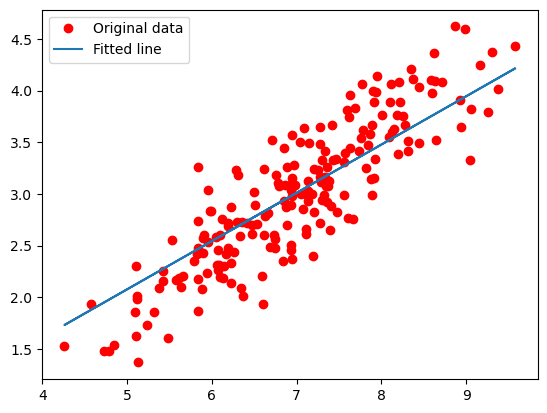

In [143]:
predicted = model(x_tensor).detach().numpy()

plt.plot(x, y, 'ro', label='Original data')
plt.plot(x, predicted, label='Fitted line')
plt.legend()
plt.show()